In [3]:
%%bash
mkdir -p ~/scratch/birdclef
if [ ! -d ~/scratch/birdclef/EfficientLEAF ]; then
    git clone https://github.com/CPJKU/EfficientLEAF.git ~/scratch/birdclef/EfficientLEAF
fi

In [7]:
import sys
import os

leaf_path = os.path.expanduser("~/scratch/birdclef/EfficientLEAF")
if leaf_path not in sys.path:
    sys.path.append(leaf_path)

In [8]:
import sys
sys.path

['/usr/lib64/python39.zip',
 '/usr/lib64/python3.9',
 '/usr/lib64/python3.9/lib-dynload',
 '',
 '/storage/scratch1/7/acheung46/birdclef/.venv/lib64/python3.9/site-packages',
 '/storage/scratch1/7/acheung46/birdclef/.venv/lib/python3.9/site-packages',
 '/home/scratch/birdclef/EfficientLEAF',
 '/storage/home/hcoda1/7/acheung46/scratch/birdclef/EfficientLEAF']

In [9]:
from model.efficientleaf import EfficientLeaf

frontend = EfficientLeaf(n_filters=80, min_freq=60, max_freq=7800,
                         sample_rate=16000,
                         num_groups=8, conv_win_factor=6, stride_factor=16)


In [10]:
import librosa
import torch

train_audio_path = os.path.expanduser("~/shared/birdclef/raw/birdclef-2024/train_audio")

species = "asbfly"
filename = "XC49755.ogg"

audio_path = os.path.join(train_audio_path, species, filename)
y, sr = librosa.load(audio_path, sr=16000)
audio_tensor = torch.FloatTensor(y).unsqueeze(0)

output = frontend(audio_tensor)

In [13]:
output.shape

torch.Size([1, 2, 80, 5275])

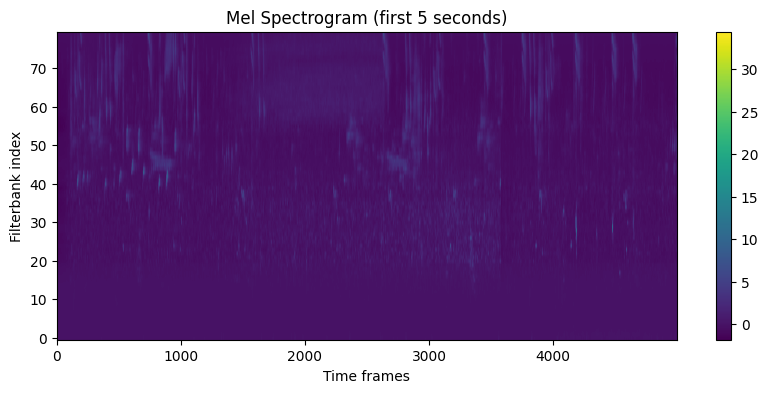

In [14]:
import matplotlib.pyplot as plt

# Calculate the corresponding number of frames for the first 5 seconds
frames = int(5 * sr / 16)  # using stride_factor=16

# Extract the mel spectrogram slice from the output tensor (batch=0, first channel)
spec = output[0, 0, :, :frames].detach().numpy()

plt.figure(figsize=(10, 4))
plt.imshow(spec, aspect='auto', origin='lower')
plt.title("Mel Spectrogram (first 5 seconds)")
plt.xlabel("Time frames")
plt.ylabel("Filterbank index")
plt.colorbar()
plt.show()